In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
#leo el dataframe
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [28]:
#1. Genera una tabla de frecuencia para category y muestra cuáles son las top 5 categorías

frequency_table = df["category"].value_counts()
frequency_table_subset = frequency_table.head(5)

In [29]:
frequency_table_subset

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

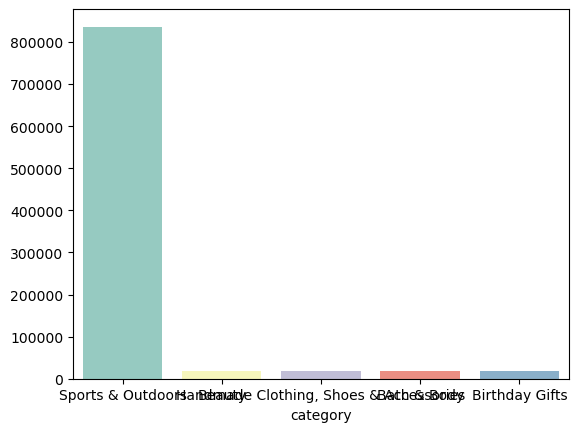

In [26]:
#2. Usa un archart para moestrar la distribución de los distintas categorías de productos

sns.barplot(x=frequency_table_subset.index, y = frequency_table_subset.values, palette = "Set3");

<Axes: ylabel='count'>

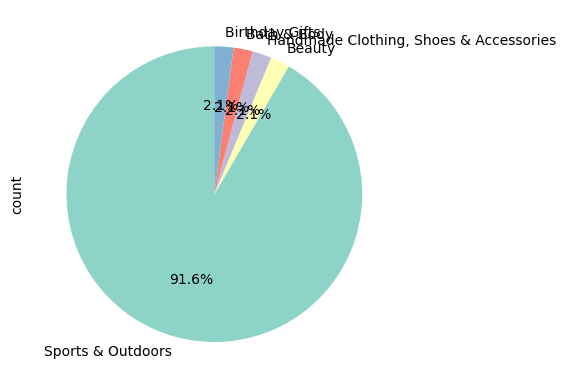

In [30]:
frequency_table_subset.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))

In [8]:
#sí, la cateogría deportes y exterior es claramente predominante

In [9]:
df["price"].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [10]:
#El precio medio es de 9 libras.

In [31]:
mode_price = df["price"].mode()
mode_price

0    9.99
Name: price, dtype: float64

In [12]:
#el precio medio difiere en 1 libra de la moda, el precio más repetido

In [13]:
variance_price = df["price"].mode()
std_price = df["price"].std()
range_price = df["price"].max() - df["price"].min()
quantiles_price =  df['price'].quantile([0.25, 0.5, 0.75])
max_price = df["price"].min()

quantiles_price

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

In [14]:
#sí, el rango de precios varía en 100000, hay productos de precio 0 y otros con precio 100000
#pero la desviación estandar no es muy elevada, tan solo de 345 libras
#por debajo de 10 libras está el 25% de los productos más baratos
#por encima de las 46 los productos están entre el 25% más caro.

#la mayor parte de los productos son baratos, aunque hay algunos, los que menos, muy caros.

<Axes: xlabel='price', ylabel='Count'>

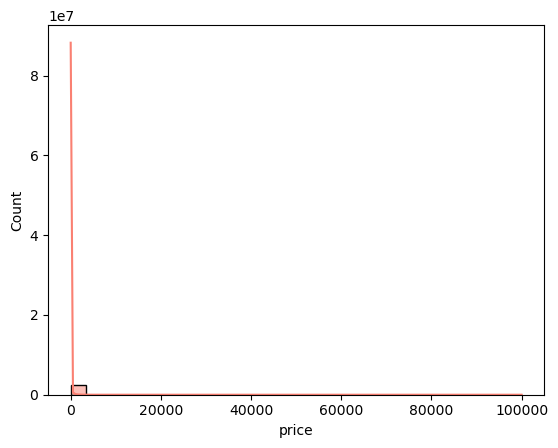

In [15]:
#3. pinta un histograma para visualizar la distribución de prroductos
sns.histplot(df['price'], kde=True, bins=30, color="salmon")

#sí, es difícil leer este gráfico, la solución podría ser eliminar los outliers.

<Axes: >

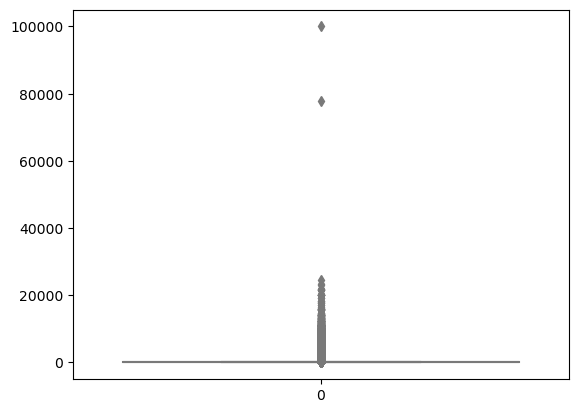

In [16]:
sns.boxplot(data = df['price'], color="lightblue")

<Axes: >

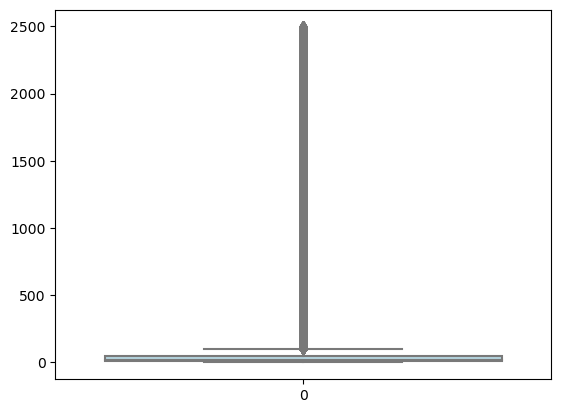

In [34]:
sns.boxplot(data = df[df['price'] <= 2500]["price"], color="lightblue")

In [17]:
#vemos que la mayor parte de productos están por debajo de los 20000 euros
#además hay valores outliers muy claros en 80000 y 100000

In [18]:
df["stars"].describe()

count    2.443651e+06
mean     2.152836e+00
std      2.194865e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.400000e+00
max      5.000000e+00
Name: stars, dtype: float64

In [19]:
variance_stars = df["stars"].var()
variance_stars

4.81743402976196

In [20]:
#la mayor parte de los clientes califican los productos con un 0
#la media de votación es de 2.2
#la puntuación de 4.4 está en el 75% más alta de las puntuaciones
#algunos clientes han votado con un 5
#hay una amplia variación entre el feedback de los clientes, aunque la mayoría puntua con un 0 los productos
#la desviación típica y la media es prácticamente igual

In [21]:
skewness_stars = df["stars"].skew()
kurtosis_stars = df["stars"].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

In [22]:
#la skewness sugiere una ligera asimetría hacia la derecha, aunque es bastante cercana a la distribución simétrica.
#la curtosis negativa indica una distribución relativamente plana con colas más ligeras de lo normal.

<Axes: xlabel='stars', ylabel='Count'>

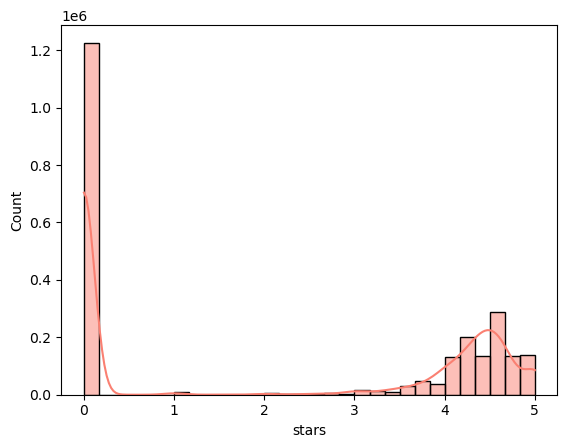

In [23]:
#4. Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?
sns.histplot(df["stars"], kde=True, bins=30, color='salmon')



In [28]:
#sí, el más común de los ratings es cero y con mucha diferencia